In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [2]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [4]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [5]:
x_train.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()


In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [10]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 547s 3s/step - loss: 1.2485 - accuracy: 0.4841 - val_loss: 1.0973 - val_accuracy: 0.5627
Epoch 2/10
180/180 [==============================] - 66s 365ms/step - loss: 1.0477 - accuracy: 0.5782 - val_loss: 1.0557 - val_accuracy: 0.5868
Epoch 3/10
180/180 [==============================] - 65s 362ms/step - loss: 0.9795 - accuracy: 0.6125 - val_loss: 0.9921 - val_accuracy: 0.6053
Epoch 4/10
180/180 [==============================] - 66s 366ms/step - loss: 0.9386 - accuracy: 0.6398 - val_loss: 0.8307 - val_accuracy: 0.6799
Epoch 5/10
180/180 [==============================] - 65s 363ms/step - loss: 0.8835 - accuracy: 0.6650 - val_loss: 0.8790 - val_accuracy: 0.6551
Epoch 6/10
180/180 [==============================] - 66s 366ms/step - loss: 0.8509 - accuracy: 0.6732 - val_loss: 0.9633 - val_accuracy: 0.6433
Epoch 7/10
180/180 [==============================] - 65s 361ms/step - loss: 0.8144 - accuracy: 0.6915 - val_loss: 0.8327 - val_accu

In [13]:
model.save('IBM_flowers.h5')


In [14]:
pwd

'/content'

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [16]:
model=load_model('IBM_flowers.h5')


In [30]:
img=image.load_img('/content/drive/MyDrive/ibm project/flowers/tulip/14017640283_c417141832_n.jpg')

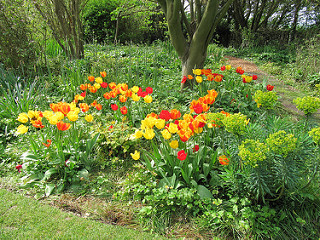

In [31]:
img

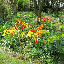

In [21]:
img=image.load_img('/content/drive/MyDrive/ibm project/flowers/tulip/14017640283_c417141832_n.jpg',target_size=(64,64))
img

In [22]:
x=image.img_to_array(img)
x

array([[[147., 162.,  59.],
        [104., 111.,  69.],
        [ 80.,  85.,  27.],
        ...,
        [ 98.,  91.,  75.],
        [ 53.,  48.,  52.],
        [ 64.,  81.,  27.]],

       [[108., 109.,  52.],
        [ 68.,  98.,  38.],
        [ 98., 119.,  50.],
        ...,
        [ 46.,  66.,  31.],
        [ 32.,  48.,  37.],
        [ 82.,  93.,  37.]],

       [[131., 145.,  86.],
        [119., 147.,  44.],
        [ 77.,  88.,  46.],
        ...,
        [ 91., 106.,  75.],
        [112., 125.,  56.],
        [ 48.,  58.,  59.]],

       ...,

       [[126., 162.,  54.],
        [131., 163., 100.],
        [143., 167.,  73.],
        ...,
        [ 48.,  63.,  44.],
        [ 52.,  98.,  25.],
        [ 69.,  91.,  45.]],

       [[103., 152.,  43.],
        [125., 160.,  70.],
        [ 92., 126.,  13.],
        ...,
        [ 67., 103.,  59.],
        [ 33.,  66.,  21.],
        [ 43.,  62.,  40.]],

       [[111., 144.,  65.],
        [106., 140.,  66.],
        [136., 1

In [23]:
x=np.expand_dims(x,axis=0)
x

array([[[[147., 162.,  59.],
         [104., 111.,  69.],
         [ 80.,  85.,  27.],
         ...,
         [ 98.,  91.,  75.],
         [ 53.,  48.,  52.],
         [ 64.,  81.,  27.]],

        [[108., 109.,  52.],
         [ 68.,  98.,  38.],
         [ 98., 119.,  50.],
         ...,
         [ 46.,  66.,  31.],
         [ 32.,  48.,  37.],
         [ 82.,  93.,  37.]],

        [[131., 145.,  86.],
         [119., 147.,  44.],
         [ 77.,  88.,  46.],
         ...,
         [ 91., 106.,  75.],
         [112., 125.,  56.],
         [ 48.,  58.,  59.]],

        ...,

        [[126., 162.,  54.],
         [131., 163., 100.],
         [143., 167.,  73.],
         ...,
         [ 48.,  63.,  44.],
         [ 52.,  98.,  25.],
         [ 69.,  91.,  45.]],

        [[103., 152.,  43.],
         [125., 160.,  70.],
         [ 92., 126.,  13.],
         ...,
         [ 67., 103.,  59.],
         [ 33.,  66.,  21.],
         [ 43.,  62.,  40.]],

        [[111., 144.,  65.],
       

In [24]:
y=np.argmax(model.predict(x),axis=1)
y

array([3])

In [25]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [26]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [27]:
index[y[0]]

'sunflower'